In [1]:
import os
import sys

sys.path.append("..")
os.chdir("/home/sean/HAI/main_server/hai")

import controllers.learner.datasets as ds

In [2]:
import time
from datetime import datetime, date
import calendar

start_time = calendar.timegm(date(2017, 10, 3).timetuple())
end_time = calendar.timegm(date(2017, 10, 5).timetuple())
username = "sean"

In [25]:
x, y, classes, counts = ds.get_hue_dataset2(username, start_time, end_time, incl_pose=False, incl_feats=True)

In [26]:
import numpy as np

x = np.array(x)
y = np.array(y)

for count in counts[:10]:
    print(count)
print(classes, x.shape, y.shape)

((0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0), 41104)
((1.0, 1.0, 15327.0, 121.0, 254.0, 1.0, 1.0, 15327.0, 121.0, 254.0, 0.0, 0.0, 0.0, 0.0, 0.0), 2233)
((1.0, 1.0, 33862.0, 50.0, 209.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0), 1400)
((1.0, 1.0, 33862.0, 50.0, 254.0, 1.0, 1.0, 33862.0, 50.0, 254.0, 0.0, 0.0, 0.0, 0.0, 0.0), 385)
((1.0, 1.0, 33862.0, 50.0, 42.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0), 137)
((1.0, 1.0, 33862.0, 50.0, 145.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0), 103)
((1.0, 1.0, 51422.0, 220.0, 1.0, 1.0, 1.0, 50993.0, 232.0, 119.0, 0.0, 0.0, 0.0, 0.0, 0.0), 24)
((1.0, 1.0, 57871.0, 242.0, 254.0, 1.0, 1.0, 33862.0, 50.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0), 14)
((1.0, 1.0, 57871.0, 242.0, 41.0, 1.0, 1.0, 50993.0, 232.0, 103.0, 0.0, 0.0, 0.0, 0.0, 0.0), 13)
((1.0, 1.0, 33862.0, 50.0, 42.0, 1.0, 1.0, 33862.0, 50.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0), 11)
[(0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 

0 / 45450
1000 / 45450
2000 / 45450
3000 / 45450
4000 / 45450


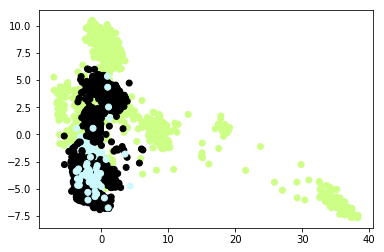

In [27]:
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA    
from sklearn.manifold import TSNE

%matplotlib inline
tsne = PCA(n_components=2)
x_red = tsne.fit_transform(x[y != 0])

import matplotlib
colors = []

for i, label in enumerate(y[y != 0]):
    if i % 1000 == 0:
        print(i, "/", len(y), flush=True)
    
    if label == len(classes):
        hsb = [1.0, 0, 0]
    else:
        hue_class = classes[label]
        #hsb = [hue_class[2]/65536.0, hue_class[3]/255.0, hue_class[4]/255.0]
        hsb = [hue_class[7]/65536.0, hue_class[8]/255.0, hue_class[9]/255.0]
    rgb = matplotlib.colors.hsv_to_rgb(hsb)
    colors.append(rgb)

plt.scatter(x_red[:,0][::-1], x_red[:,1][::-1], c=colors)

In [28]:
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.metrics import confusion_matrix
from sklearn import linear_model
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

np.random.seed(1984)
#shuffle_i = np.random.permutation(np.arange(len(x)))

N = len(x)
train_x, test_x = x[:N//2], x[N//2:]
train_x = scaler.fit_transform(train_x)
test_x = scaler.transform(test_x)
train_y, test_y = y[:N//2], y[N//2:]

In [36]:
def fit(clf):
    t = time.time()
    clf.fit(train_x, train_y)
    print("time:", time.time()-t)
    print(clf.score(train_x, train_y))
    print(clf.score(test_x, test_y))
    
from sklearn.ensemble import RandomForestClassifier
clf = RandomForestClassifier(n_estimators=10, class_weight="balanced")
print("random forest")
fit(clf)

"""
from sklearn.neural_network import MLPClassifier
clf = MLPClassifier(hidden_layer_sizes=(10,))
print("neural")
fit(clf)

from sklearn import svm
clf = svm.SVC()
print("svm")
fit(clf)

clf = svm.LinearSVC()
print("linear svm")
fit(clf)
"""

random forest
time: 2.886857032775879
0.999075907591
0.925104510451


'\nfrom sklearn.neural_network import MLPClassifier\nclf = MLPClassifier(hidden_layer_sizes=(10,))\nprint("neural")\nfit(clf)\n\nfrom sklearn import svm\nclf = svm.SVC()\nprint("svm")\nfit(clf)\n\nclf = svm.LinearSVC()\nprint("linear svm")\nfit(clf)\n'

In [18]:
clf = MLPClassifier(hidden_layer_sizes=(50,))
print("neural")
fit(clf)

neural
time: 8.197562217712402
0.996699669967
0.907326732673


In [37]:
from sklearn.metrics import confusion_matrix
print(confusion_matrix(train_y, clf.predict(train_x)))
print(confusion_matrix(test_y, clf.predict(test_x)))

[[19834     0     0     0     0]
 [    2  2231     0     0     0]
 [    1     1   328     0     0]
 [    6     0     0   131     0]
 [   11     0     0     0   180]]
[[21023   247     0     0]
 [    0     0     0     0]
 [ 1385    14     0     1]
 [   55     0     0     0]]


In [33]:
from sklearn.metrics import confusion_matrix
print(confusion_matrix(train_y, clf.predict(train_x)))
print(confusion_matrix(test_y, clf.predict(test_x)))

[[19834     0     0     0     0]
 [    3  2230     0     0     0]
 [    1     0   329     0     0]
 [   10     0     0   127     0]
 [   12     0     0     0   179]]
[[21186    84     0     0]
 [    0     0     0     0]
 [ 1380    20     0     0]
 [   53     0     0     2]]


In [38]:
import pickle
pickle.dump({"classes": classes, "classifier": clf, "preprocessor": scaler}, open("classifier.pkl", "wb+"))

In [ ]:
print(classes)